Run the cell below to import the necessary packages etc. to run the code.

In [1]:
import os
import warnings
from datetime import datetime

from LatticePlots import plot_energies, plot_state_distribution
from RunLattice import sweep_parameter

warnings.filterwarnings("ignore", category=RuntimeWarning) 

Use this cell to define the file where you want to save any output plots. By default, plots will be saved in the 'plots' folder under the current working directory, and labelled by today's date.

In [10]:
pwd = os.getcwd()
now = datetime.now()
save_path = pwd + "/plots/" + now.strftime("%d%b%Y-1/")
if not os.path.exists(save_path):
    os.makedirs(save_path)

In the cell below, we run the code for a range of values of the electronic coupling parameter, ```t0```. The output is a dictionary containing the solutions for each value of ```t0```. Each solution is an instance of the ```Lattice``` class, from which you can access information about the eigenstates. 

In [2]:
parameter_to_vary = "t0"
parameter_array = [1e-3, 2e-3, 3e-3, 4e-3, 5e-3]

parameter_dict = {"size":4,
                 "e_singlet":1.4,
                 "d0":5e-3,
                 "r0d":0.1,
                 "const_recombination": True,
                 "krec_ex":1e9,
                 "j0":1.5,
                 "r0j":0.1,
                 "F":[0, 0, 0],
                 "disorder_site_ene":50e-3}

lattice_dict = sweep_parameter(parameter_to_vary,parameter_array,parameter_dict)

Run the cell below to see how the energies of the eigenstates depends on the electron-hole separation and the value of ```t0```.

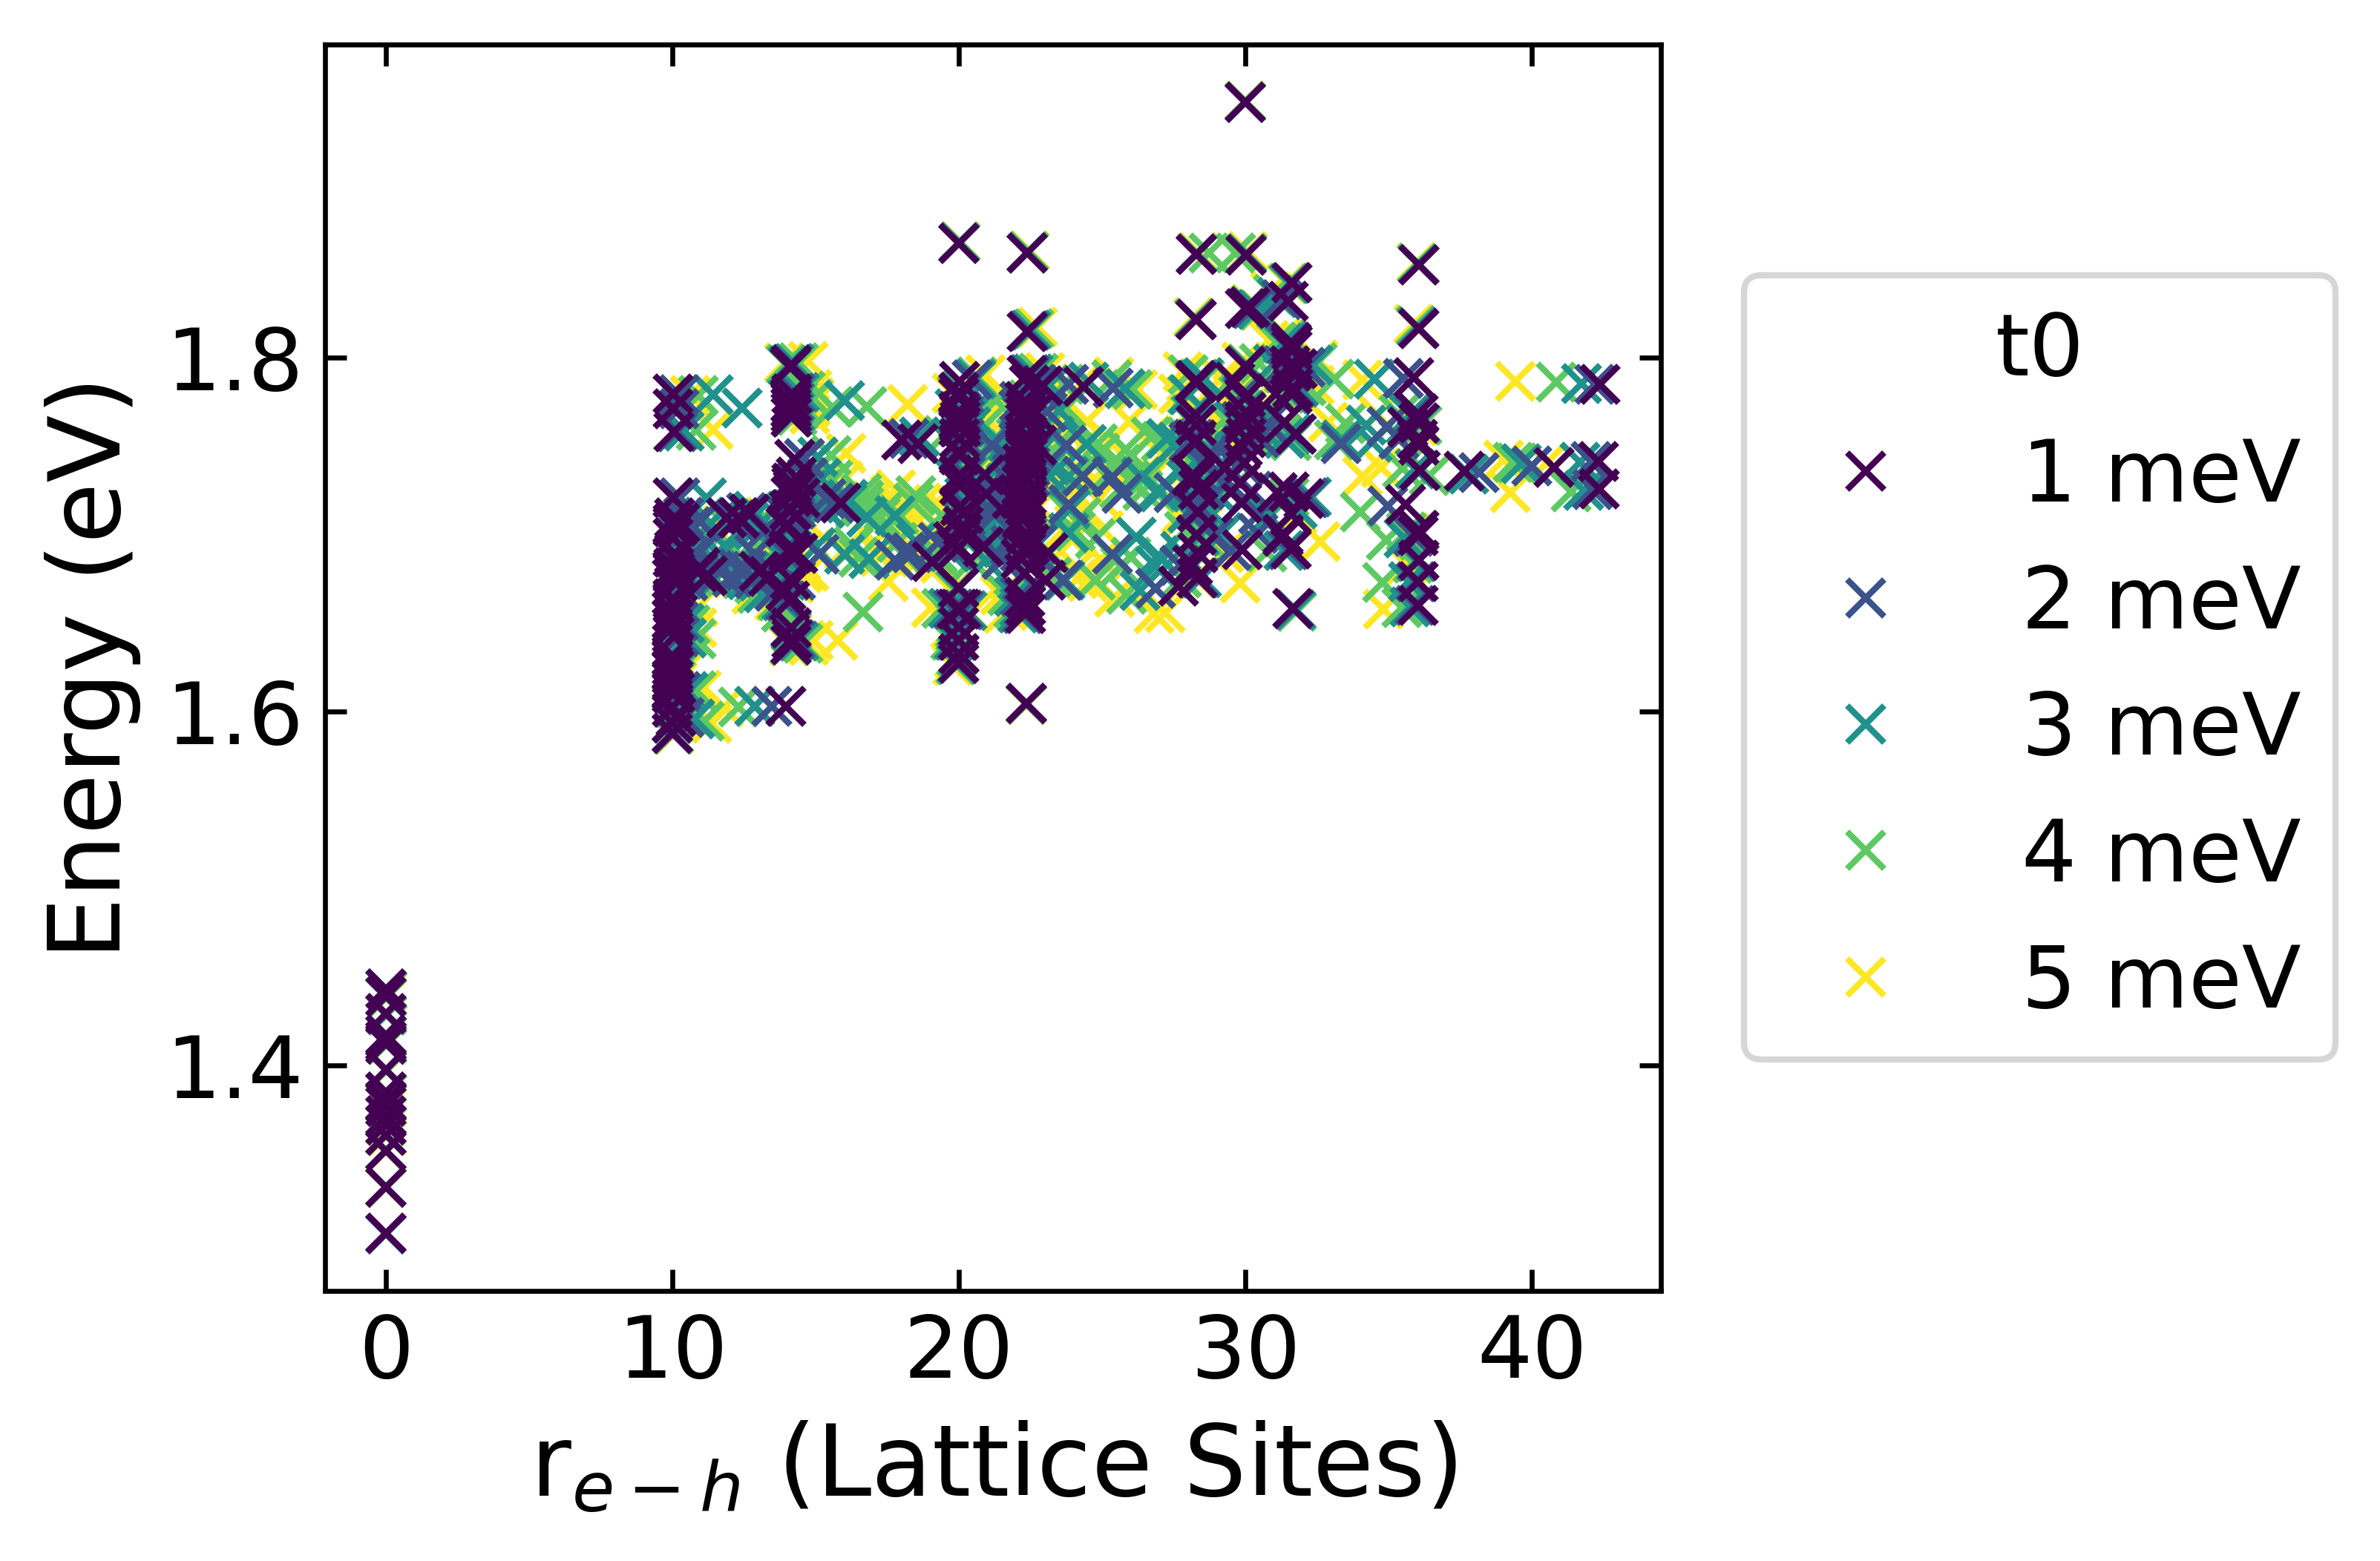

In [3]:
save = False
labels = ["1 meV", "2 meV", "3 meV", "4 meV", "5 meV"]
plot_energies(lattice_dict, parameter_array, labels, parameter_to_vary, save)

Run the cell below to see how the electron and hole probability density is distributed across the lattice for a given eigenstate. You can choose which solution to look at by varying the ```which_lattice``` parameter and you can select a state by varing the ```which_state``` parameter. By default, the eigenstates are ranked by their energy and so ```which_state = 0``` corresponds to the lowest energy state. 

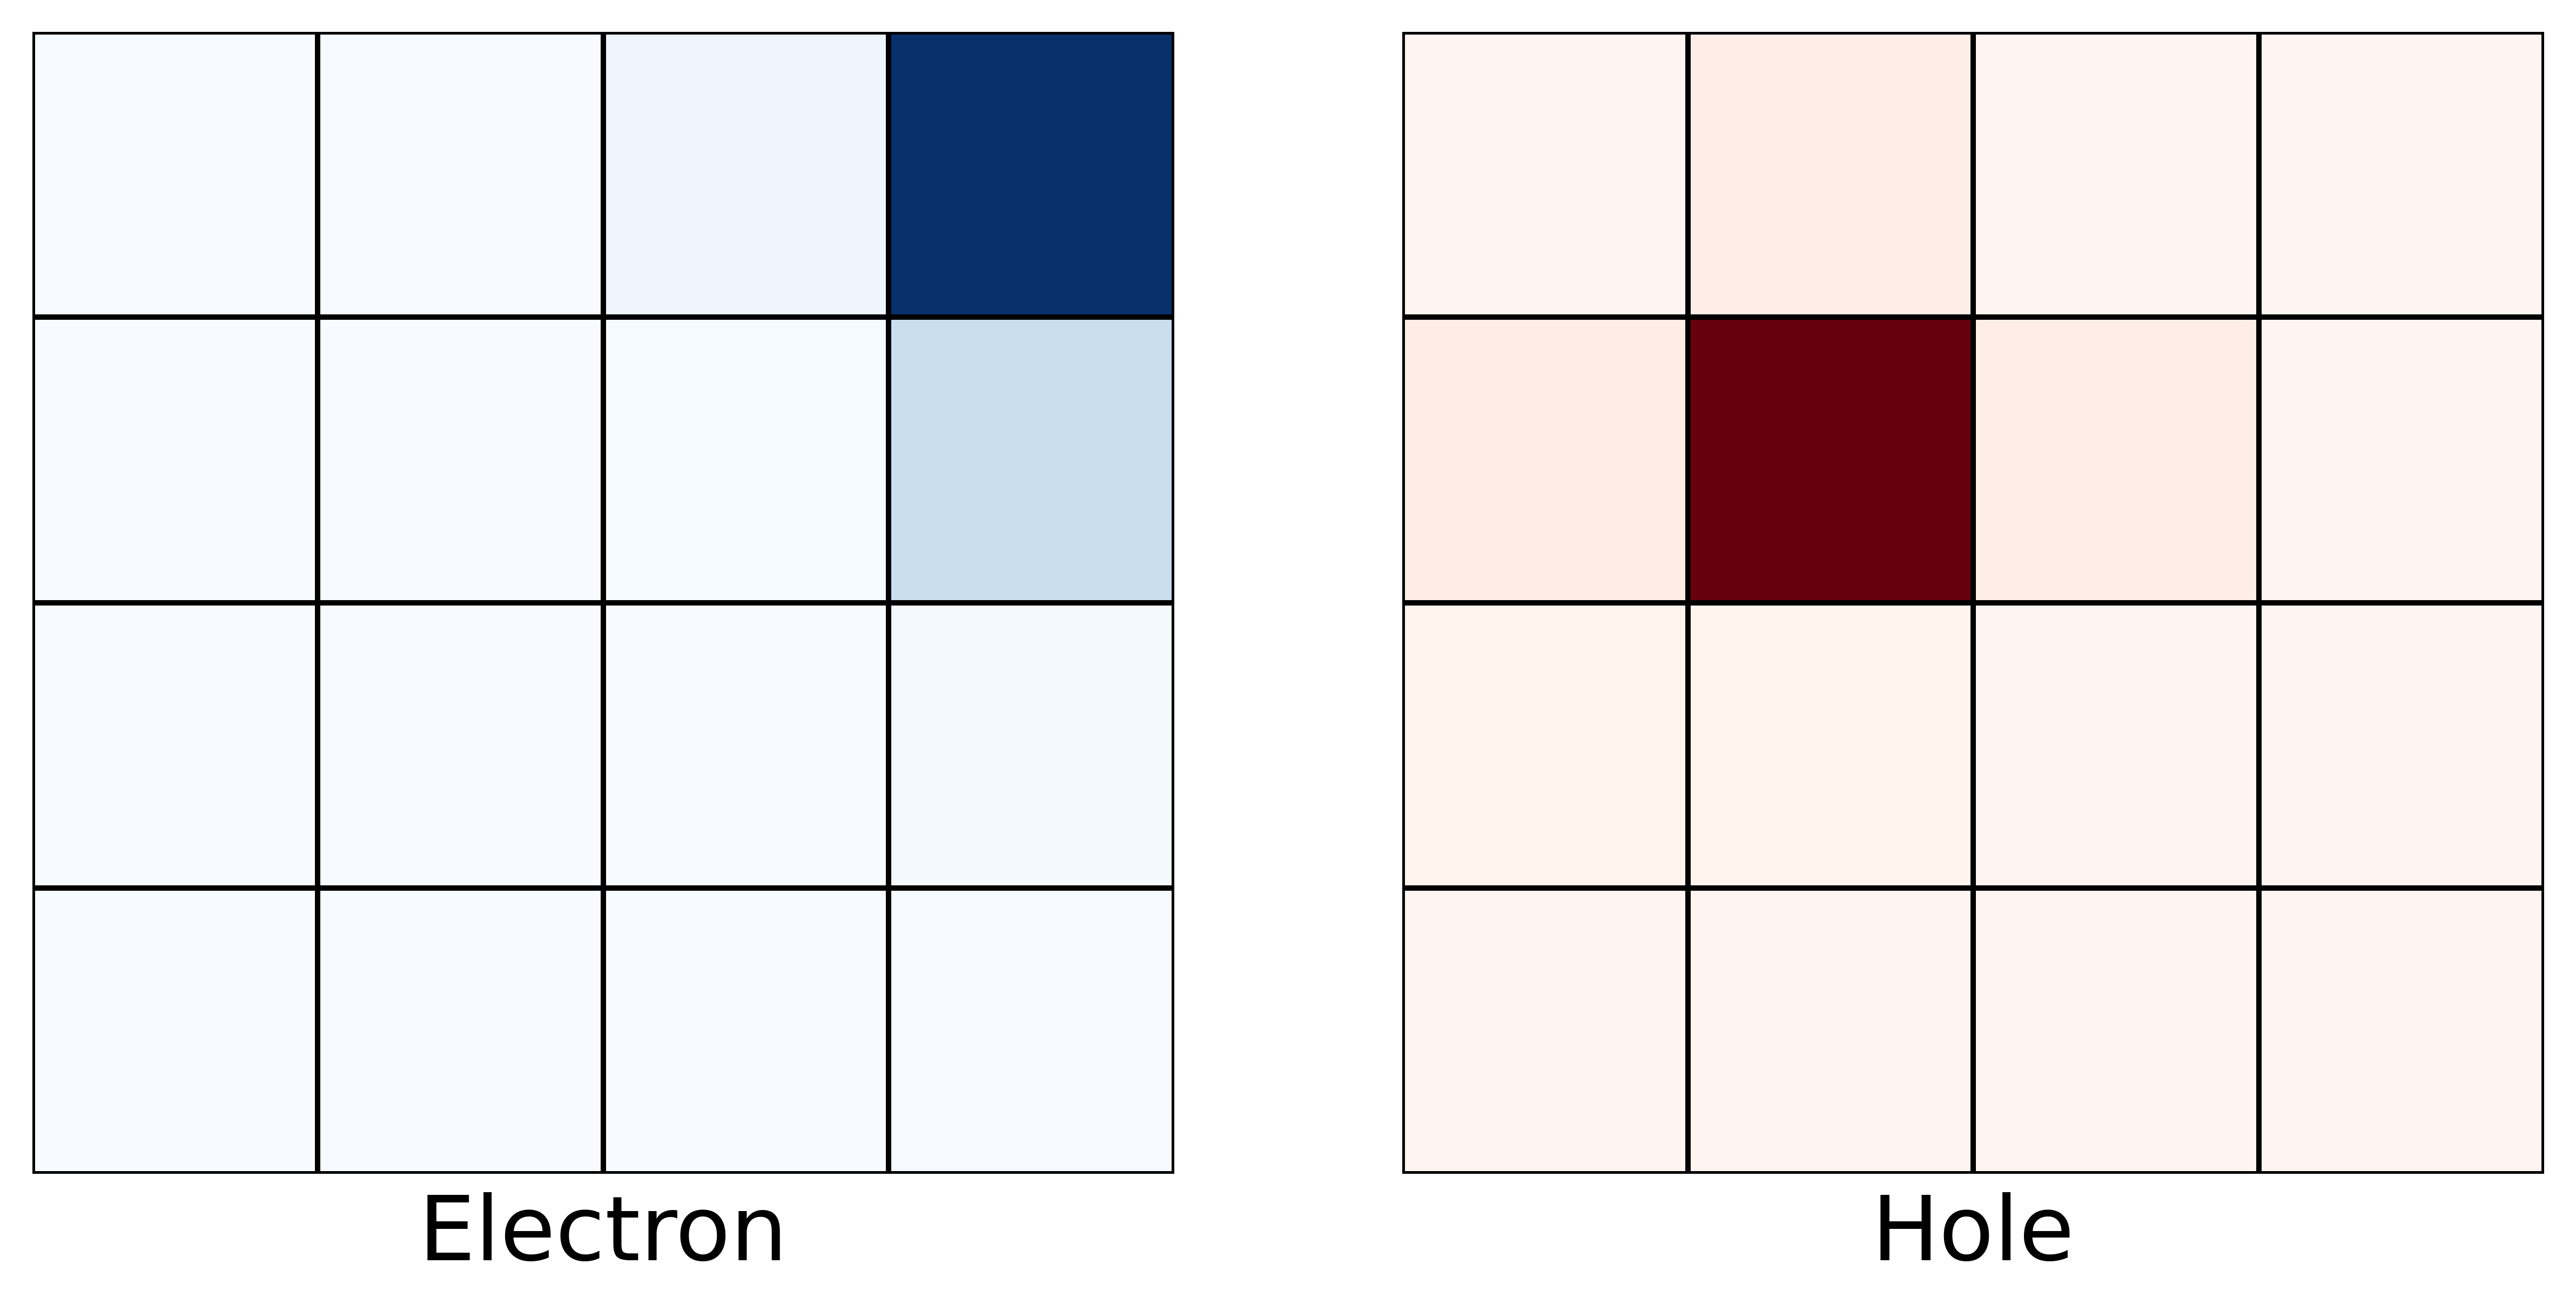

In [3]:
which_lattice = 4
which_state = 100
plot_state_distribution(lattice_dict[which_lattice], which_state) 